In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
datapath = '../../../data/motionstage/'

In [26]:
cfg = np.load(os.path.join(datapath, '1mm-away-rbw-800/config.npy'), allow_pickle=True).item()
nfft = cfg['nfft']
dist_start = 50
dist_end = 100
dist_vec = cfg['dist_vec'][dist_start:dist_end]

0.392599301001356
0.39883103593788544
0.39883103593788544
0.4050627708744149
0.41129450581094434
0.41129450581094434
0.41752624074747385
0.41752624074747385


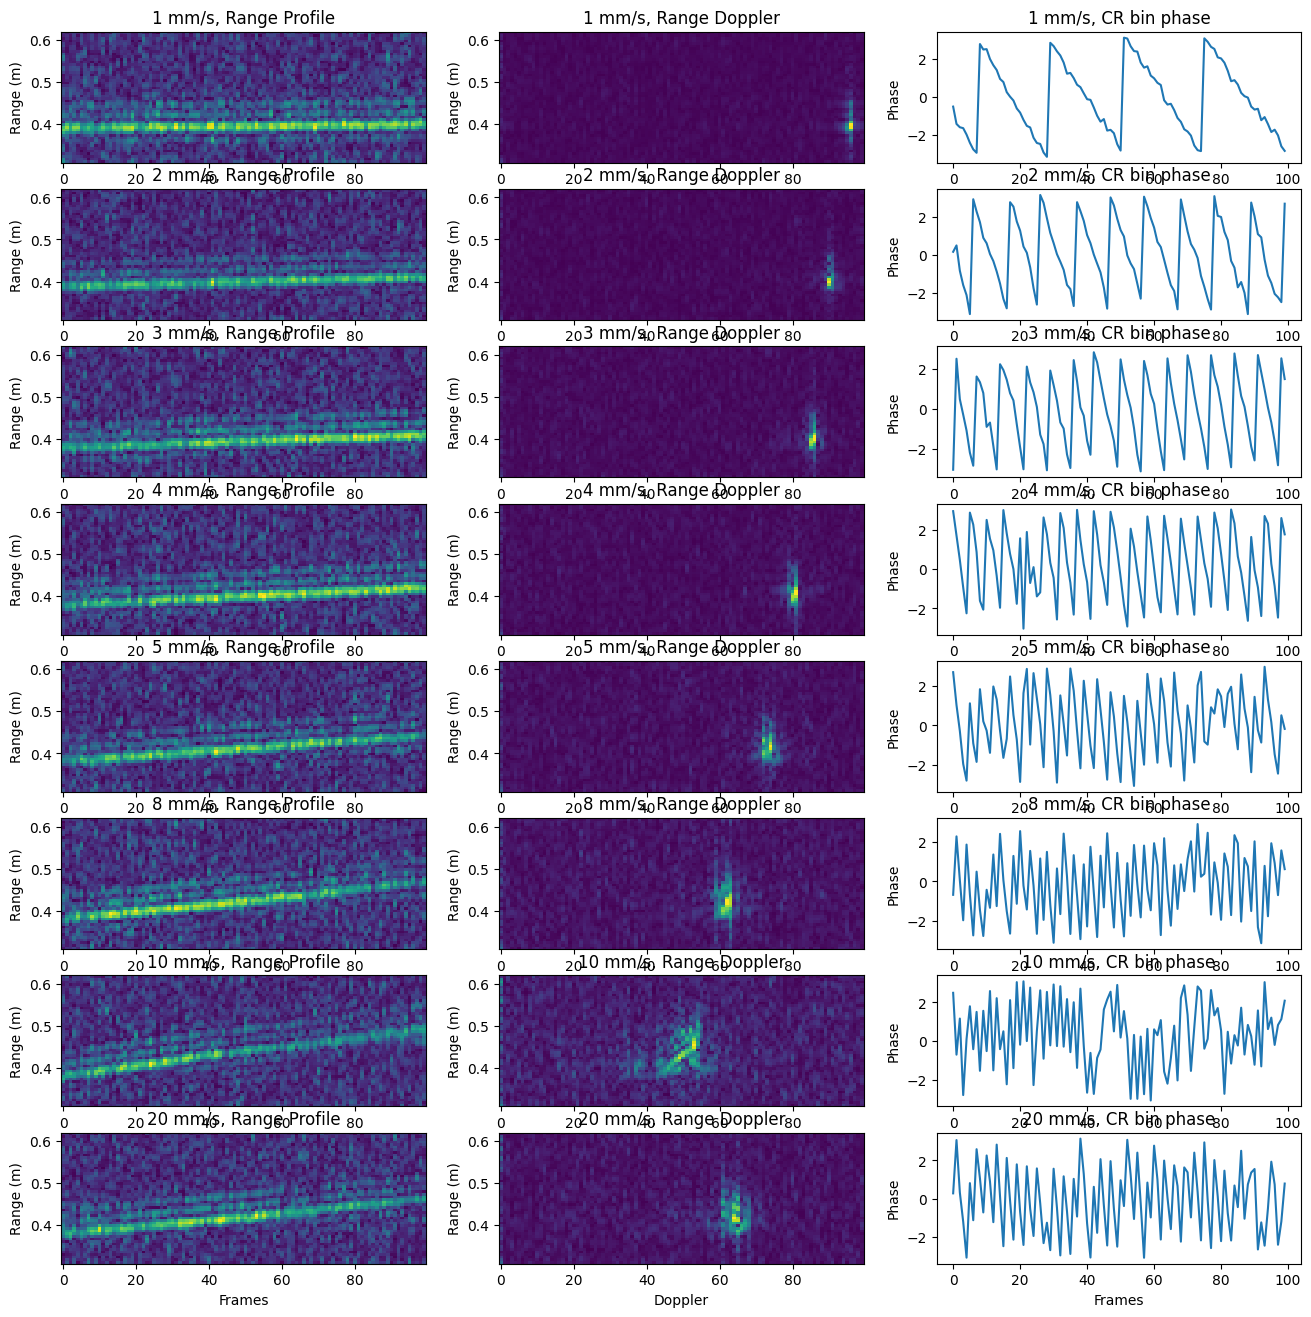

In [27]:
vels = [1, 2, 3, 4, 5, 8, 10, 20]
plt.subplots(len(vels), 3, figsize=(16, 16))
for vel_idx in range(len(vels)):
    recData = np.load(os.path.join(datapath, '{}mm-away-rbw-800/recording.npy'.format(vels[vel_idx])))
    rp = np.fft.ifft(recData[:, 0, :], axis=1, n=nfft)[:, dist_start:dist_end]
    rd = np.fft.fft(rp, axis=0)
    cr_bin = np.argmax(np.sum(np.abs(rp), axis=0))
    print(dist_vec[cr_bin])

    plt.subplot(len(vels), 3, 3*vel_idx+1)
    plt.pcolormesh(np.arange(100), dist_vec, np.abs(rp).T)
    plt.title('{} mm/s, Range Profile'.format(vels[vel_idx]))
    plt.xlabel('Frames')
    plt.ylabel('Range (m)')
    plt.subplot(len(vels), 3, 3*vel_idx+2)
    plt.pcolormesh(np.arange(100), dist_vec, np.abs(rd).T)
    plt.title('{} mm/s, Range Doppler'.format(vels[vel_idx]))
    plt.xlabel('Doppler')
    plt.ylabel('Range (m)')
    plt.subplot(len(vels), 3, 3*vel_idx+3)
    plt.plot(np.arange(100), np.angle(rp[:, cr_bin]))
    plt.xlabel('Frames')
    plt.ylabel('Phase')
    plt.title('{} mm/s, CR bin phase'.format(vels[vel_idx]))

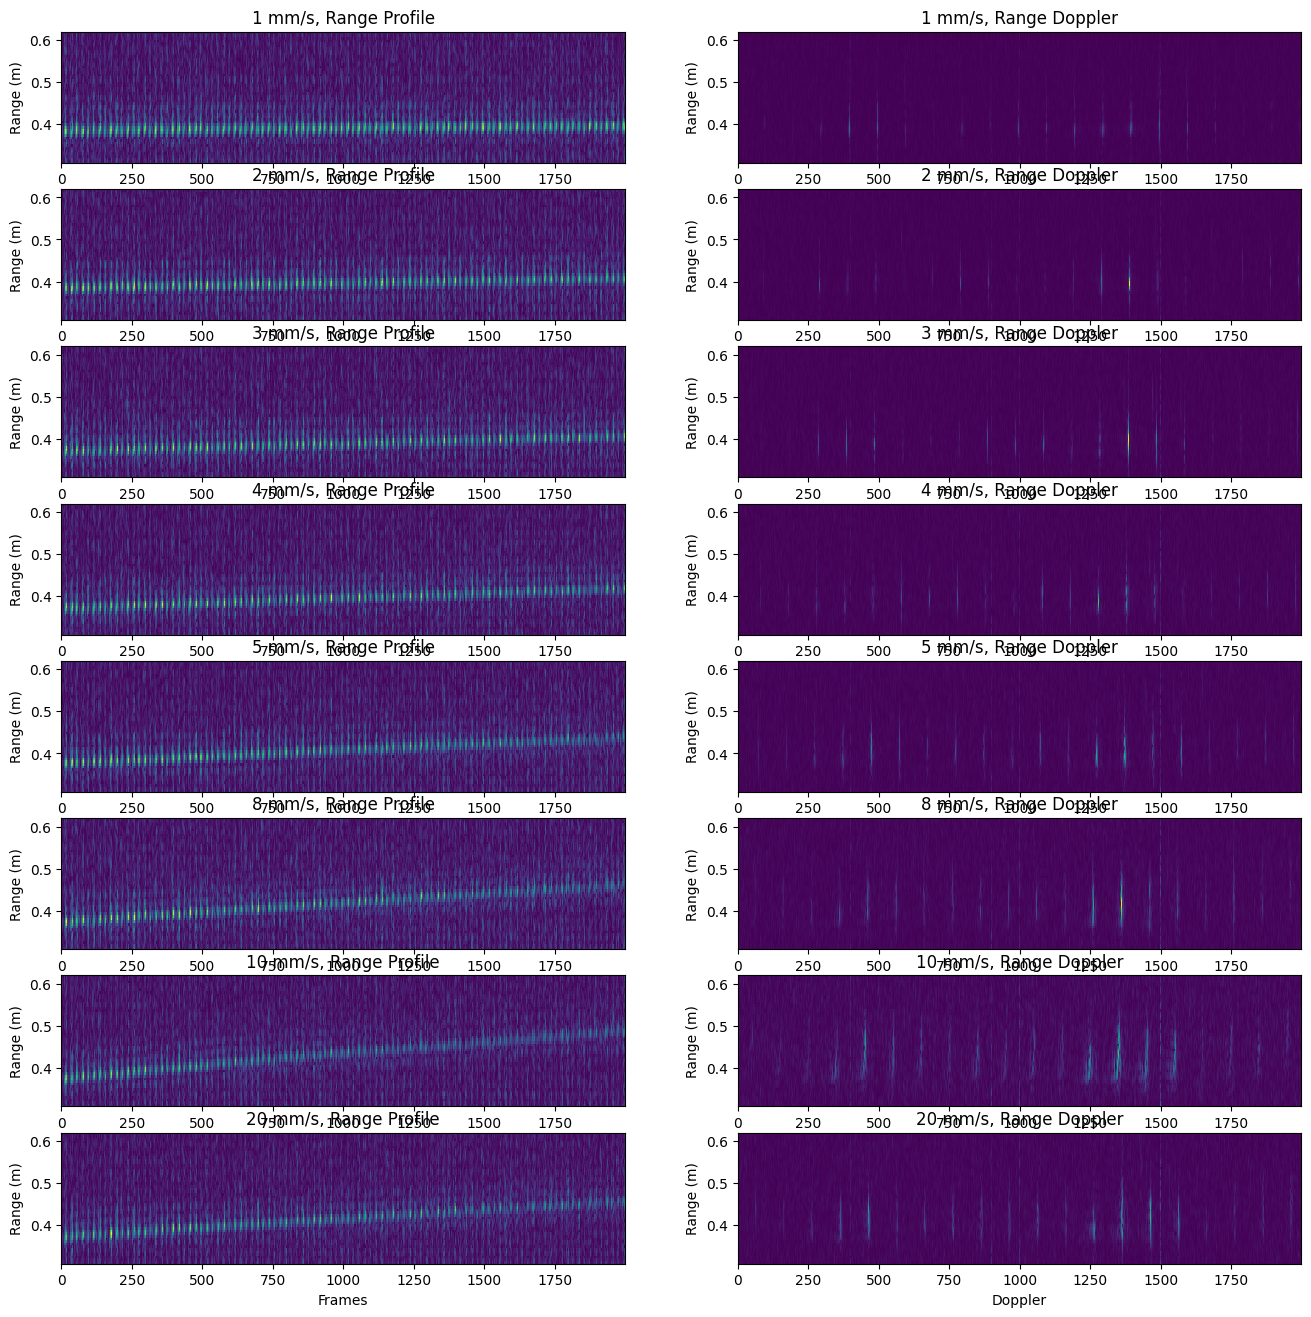

In [28]:
vels = [1, 2, 3, 4, 5, 8, 10, 20]
plt.subplots(len(vels), 2, figsize=(16, 16))
for vel_idx in range(len(vels)):
    recData = np.load(os.path.join(datapath, '{}mm-away-rbw-800/recording.npy'.format(vels[vel_idx]))) # 100 * 400 * 150
    recData = recData[:, ::20, :].reshape(100 * 20, 150)
    rp = np.fft.ifft(recData[:, :], axis=1, n=nfft)[:, dist_start:dist_end]
    rd = np.fft.fft(rp, axis=0)
    plt.subplot(len(vels), 2, 2*vel_idx+1)
    plt.pcolormesh(np.arange(2000), dist_vec, np.abs(rp).T)
    plt.title('{} mm/s, Range Profile'.format(vels[vel_idx]))
    plt.xlabel('Frames')
    plt.ylabel('Range (m)')
    plt.subplot(len(vels), 2, 2*vel_idx+2)
    plt.pcolormesh(np.arange(2000), dist_vec, np.abs(rd).T)
    plt.title('{} mm/s, Range Doppler'.format(vels[vel_idx]))
    plt.xlabel('Doppler')
    plt.ylabel('Range (m)')

0.38636756606482653
0.392599301001356
0.392599301001356
0.4050627708744149
0.41752624074747385
0.41752624074747385
0.41752624074747385
0.41129450581094434


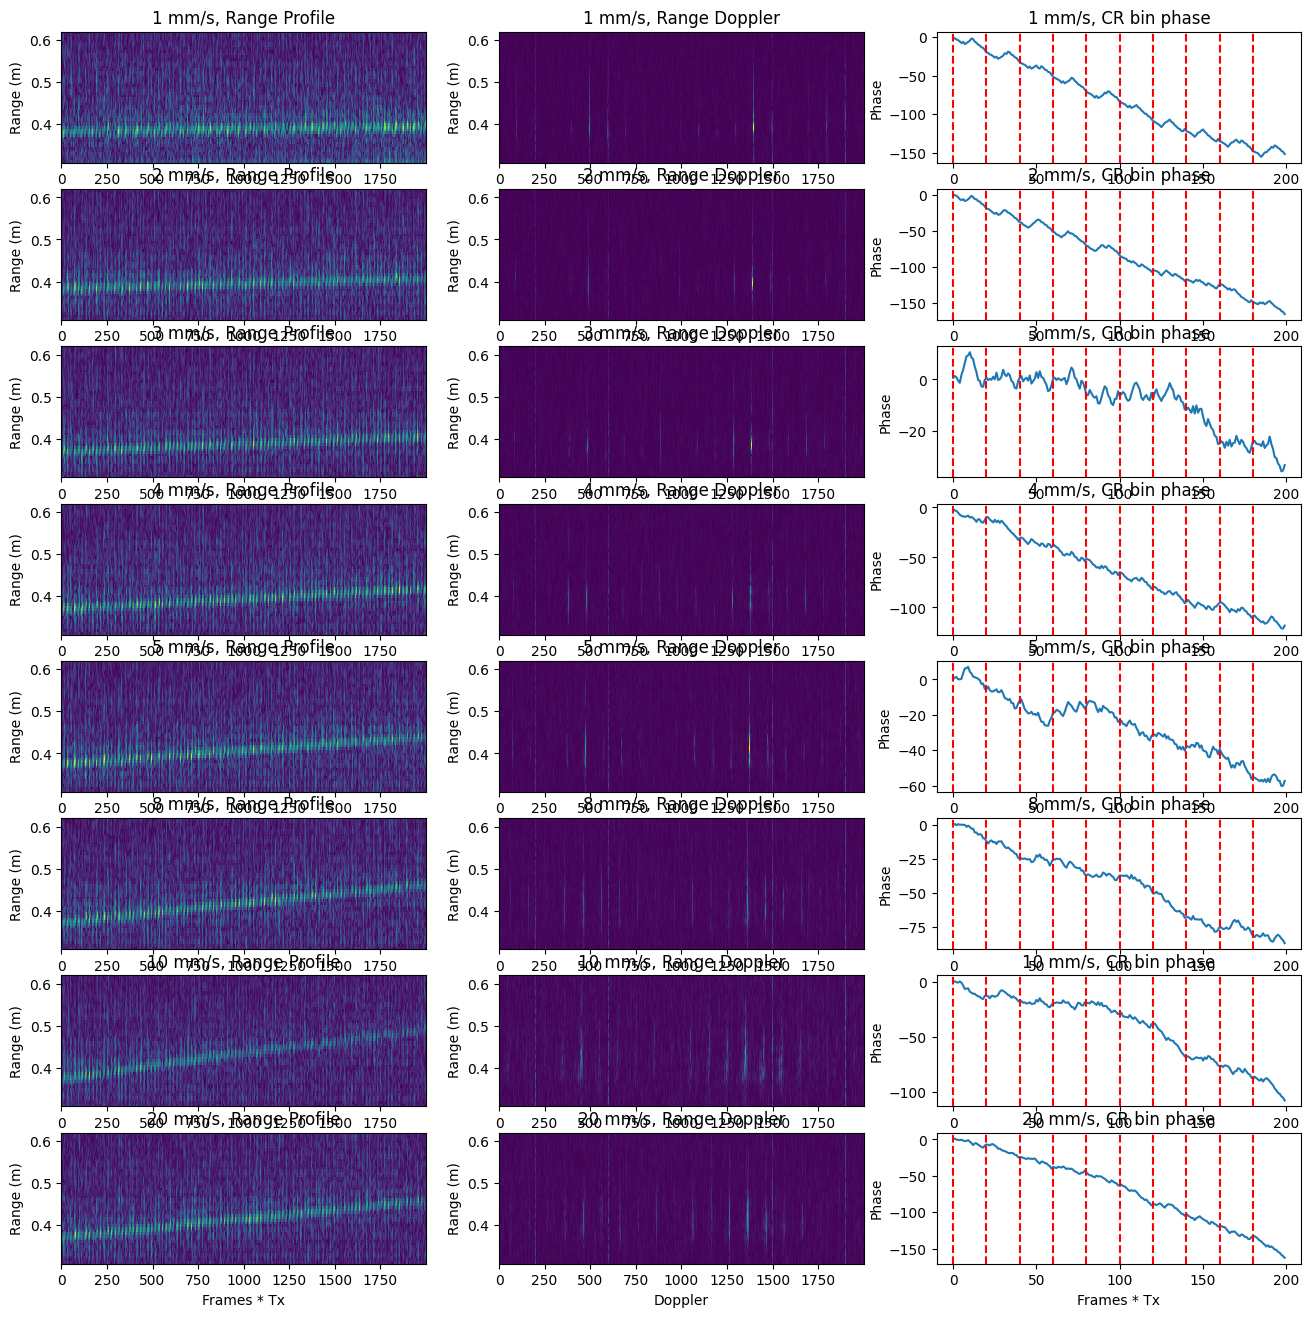

In [51]:
vels = [1, 2, 3, 4, 5, 8, 10, 20]
plt.subplots(len(vels), 3, figsize=(16, 16))
for vel_idx in range(len(vels)):
    recData = np.load(os.path.join(datapath, '{}mm-away-rbw-800/recording.npy'.format(vels[vel_idx]))) # 100 * 400 * 150
    recData = recData[:, 19::20, :].reshape(100 * 20, 150)
    rp = np.fft.ifft(recData[:, :], axis=1, n=nfft)[:, dist_start:dist_end]
    rd = np.fft.fft(rp, axis=0)
    cr_bin = np.argmax(np.sum(np.abs(rp), axis=0))
    print(dist_vec[cr_bin])

    plt.subplot(len(vels), 3, 3*vel_idx+1)
    plt.pcolormesh(np.arange(2000), dist_vec, np.abs(rp).T)
    plt.title('{} mm/s, Range Profile'.format(vels[vel_idx]))
    plt.xlabel('Frames * Tx')
    plt.ylabel('Range (m)')
    plt.subplot(len(vels), 3, 3*vel_idx+2)
    plt.pcolormesh(np.arange(2000), dist_vec, np.abs(rd).T)
    plt.title('{} mm/s, Range Doppler'.format(vels[vel_idx]))
    plt.xlabel('Doppler')
    plt.ylabel('Range (m)')
    plt.subplot(len(vels), 3, 3*vel_idx+3)
    plt.plot(np.arange(200), np.unwrap(np.angle(rp[:200, cr_bin])))
    plt.xlabel('Frames * Tx')
    plt.ylabel('Phase')
    plt.title('{} mm/s, CR bin phase'.format(vels[vel_idx]))

    for i in range(0, 200, 20):
        plt.axvline(x=i, color='r', linestyle='--')

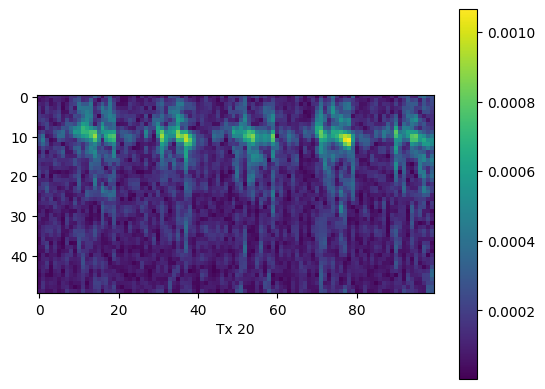

In [48]:
plt.imshow(np.abs(rp[:100, :]).T)
plt.xlabel("Tx 20")
plt.colorbar()